# Interprétation du terme linéarisation

In [76]:
# Definition d'un polynôme (Résistance fictive de type Pt100)
R0=100
alpha=0.39e-2
beta=-2e-6
def Rpoly(T, b):
    return R0*(1+alpha*T+b*T**2)

## Linéarisation par troncation du terme quadratique

In [46]:
someTemps=np.arange(0, 100)
someRlin=Rpoly(someTemps,0)
someRpoly=Rpoly(someTemps, beta)

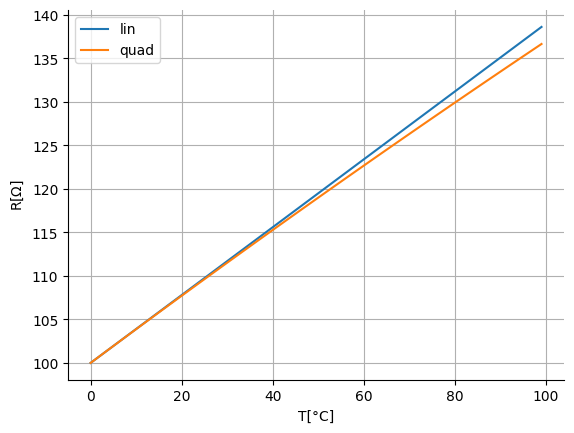

In [50]:

plotIt2(someTemps, someRlin, someTemps, someRpoly, xlab="T[°C]",ylab="R[$\Omega$]",title="",legends=["lin","quad"])

Erreur entre les 2 variantes

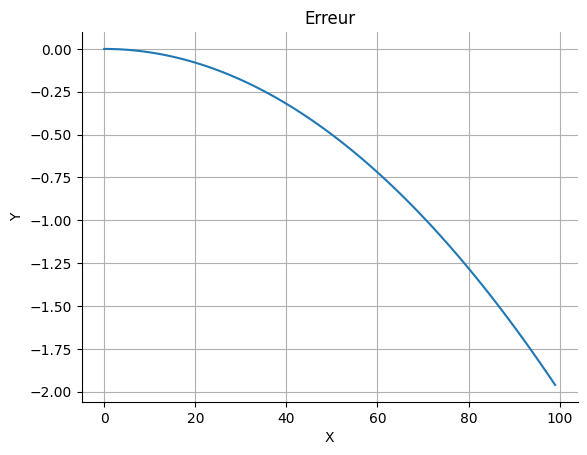

In [58]:
plotIt(someTemps, someRpoly-someRlin, title="Erreur sans terme quadratique")

## Linéarisation par les valeurs extrêmes

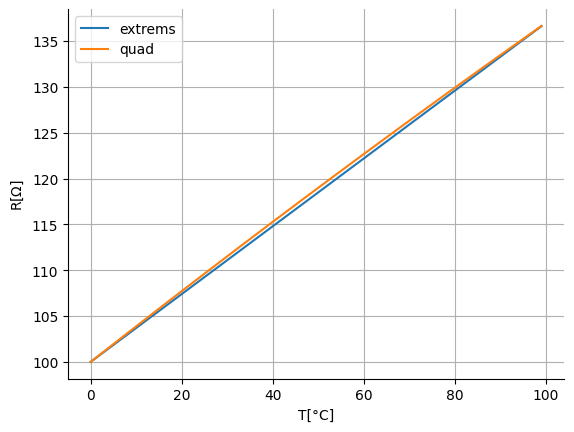

In [59]:
p=(Rpoly(100,beta)-Rpoly(0,beta))/(100-0)
someRextrems=someTemps*p+Rpoly(0,beta)
plotIt2(someTemps, someRextrems, someTemps, someRpoly,xlab="T[°C]",ylab="R[$\Omega$]",title="",legends=["extrems","quad"])            
            

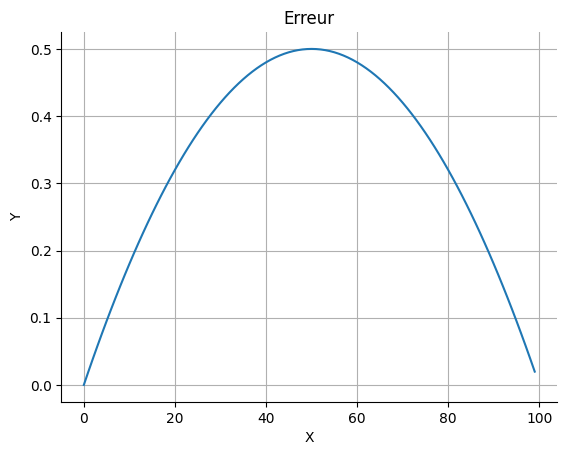

In [60]:
plotIt(someTemps, someRpoly-someRextrems, title="Erreur avec valeurs extrêmes")

## Linéarisation par un *fit*

Un fit revient à utiliser les points de la courbe pour identifier la droite qui minimise l'erreur. On a une fonction qui permet de faire ça : polyfit.

In [61]:
fitCoeffs=np.polyfit(someTemps, someRpoly,1)

In [71]:
someRfits=np.zeros(len(someTemps))
for i in range(len(someTemps)):
    T=someTemps[i]
    someRfits[i]=fitCoeffs[0]*T+fitCoeffs[1]

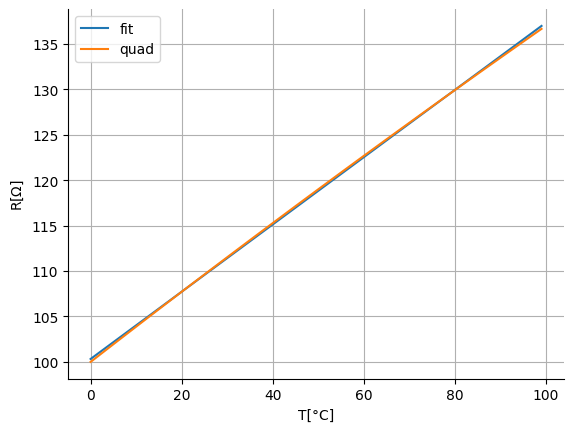

In [72]:
plotIt2(someTemps, someRfits, someTemps, someRpoly,xlab="T[°C]",ylab="R[$\Omega$]",title="",legends=["fit","quad"])  

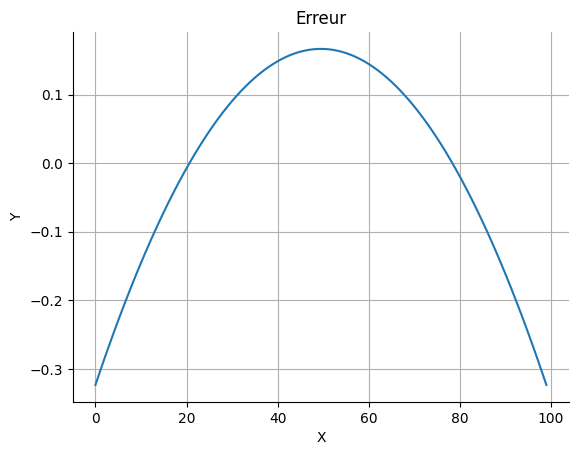

In [73]:
plotIt(someTemps, someRpoly-someRfits, title="Erreur avec fit")

In [75]:
[np.max(someRpoly-someRfits),np.min(someRpoly-someRfits)]

[0.16660000000001673, -0.32340000000000657]